In [16]:
from lightkurve import TessLightCurve
from lightkurve.search import open 
from lightkurve.correctors import RegressionCorrector
import lightkurve as lk
import numpy as np
#lc.query_solar_system_objects()

In [17]:
def findOrbitRadius(periodInDays, M):
    G = 6.67408 * (10 ** (-11))
    pi = 3.141592653589
    sunMassKG = 1.989 * (10**30)
    massKG = M * sunMassKG
    periodInSec = periodInDays * 24 * 3600
    return ((periodInSec * periodInSec*G*massKG)/4*pi*pi) ** (1. / 3)
def metersToAU(d):
    return d/(1.495978707*(10**11))

In [19]:
#pixels = open("TIC 313986452/tess2019226182529-s0015-0000000313986452-0151-s_tp.fits")
#pixels.interact()

In [116]:
lc1 = open("TIC 313986452/tess2019226182529-s0015-0000000313986452-0151-s_lc.fits")
lc2 = open("TIC 313986452/tess2019253231442-s0016-0000000313986452-0152-s_lc.fits")
lc3 = open("TIC 313986452/tess2019279210107-s0017-0000000313986452-0161-s_lc.fits")
#lcToProcess = lk.collections.LightCurveFileCollection([lc2, lc3]).PDCSAP_FLUX.stitch()
#lcToProcess.scatter()
lc = lc3.PDCSAP_FLUX.flatten(break_tolerance=50).normalize().remove_outliers()

TIC 313986452 : Folding on period  4.920999999999568


<AxesSubplot:xlabel='Phase', ylabel='Normalized Flux'>

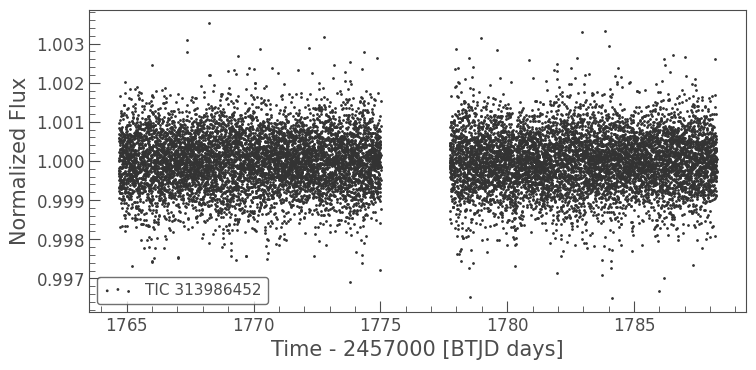

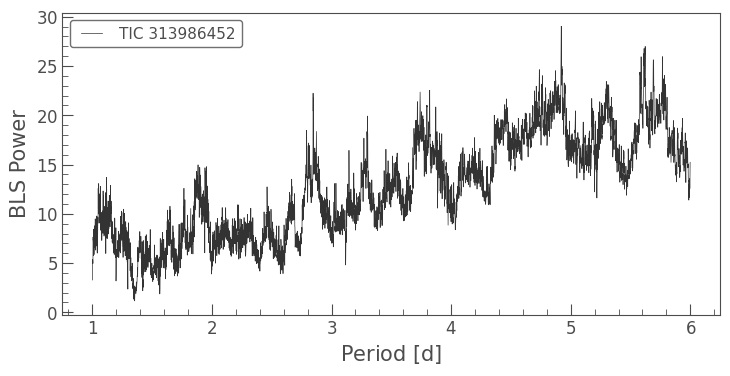

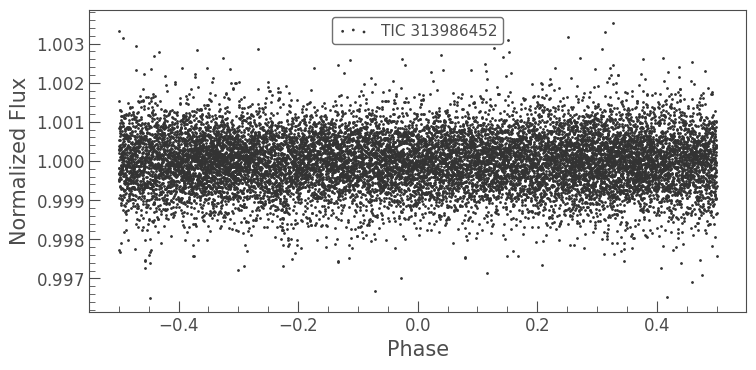

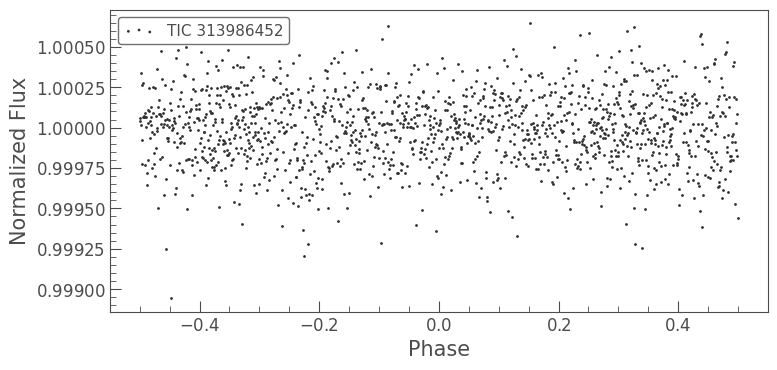

In [117]:
pg = lc.to_periodogram(method="bls", period=np.arange(1, 6, 0.001))
folded_lc = lc.fold(period=pg.period_at_max_power)
binned_lc = folded_lc.bin(binsize=10)  # Average 5 points per bin

lc.scatter()
pg.plot();
print(lc.label, ": Folding on period ", folded_lc.period)
folded_lc.scatter()
binned_lc.scatter()

#orbitRadiusInMeters =  findOrbitRadius(pg.period_at_max_power, 0.402118)
#print("Orbit in meters: ", orbitRadiusInMeters)
#orbitInAU = metersToAU(orbitRadiusInMeters)
#print("Orbit in AU: ", orbitInAU)